In [123]:
# Import libraries and load files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
file1 = r"C:\Users\Payal\Downloads\faclevel_2020.csv"
file2 = r"C:\Users\Payal\Downloads\faclevel_2021.csv"
file3 = r"C:\Users\Payal\Downloads\faclevel_2022.csv"
file4 = r"C:\Users\Payal\Downloads\faclevel_2023.csv"


df1 = pd.read_csv(file1, low_memory=False)
df2 = pd.read_csv(file2, low_memory=False)
df3 = pd.read_csv(file3, low_memory=False)
df4 = pd.read_csv(file4, low_memory=False)

data = pd.concat([df1, df2, df3, df4], ignore_index=True)
data.reset_index(drop=True, inplace=True)

## TASK1 : To print table by counting the no. of facilities by state & county

In [101]:
table = data.groupby(["Provider State", "County"])["Federal Provider Number"].count().reset_index()
table = table.rename(columns={"Federal Provider Number": "Number of Facilities"})
print(table)

     Provider State            County  Number of Facilities
0                AK         Anchorage                   516
1                AK            Bethel                   172
2                AK  Cordova-Mccarthy                   172
3                AK         Fairbanks                   172
4                AK            Juneau                   172
...             ...               ...                   ...
2892             WY        Sweetwater                   344
2893             WY             Teton                   172
2894             WY             Uinta                   172
2895             WY          Washakie                   172
2896             WY            Weston                   172

[2897 rows x 3 columns]


## TASK2 : To list top 5 states by no. of nursing home facilities & draw histogram

Provider State
TX    207322
CA    202704
OH    163280
IL    120764
FL    120377
Name: Federal Provider Number, dtype: int64


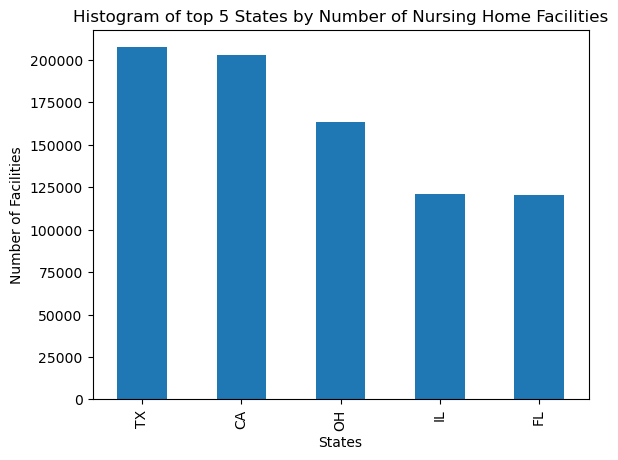

In [103]:
top_states = data.groupby("Provider State")["Federal Provider Number"].count()
 
top_states = top_states.sort_values(ascending=False)
print(top_states.head())

top_states.head(5).plot.bar()
plt.xlabel("States")
plt.ylabel("Number of Facilities")
plt.title("Histogram of top 5 States by Number of Nursing Home Facilities")
plt.show()

## TASK3 : Compute hospital bed occupancy in % for each facility in Middlesex County in MA

In [112]:
middlesex_county = data[(data["County"] == "Middlesex") & (data["Provider State"] == "MA")]

middlesex_county["Hospital Bed Occupancy (%)"] = (middlesex_county["Total Number of Occupied Beds"] / middlesex_county["Number of All Beds"]) * 100

#print("Hospital Bed Occupancy in % for Middlesex County in Massachusetts")
#print(middlesex_county[["Federal Provider Number", "Provider Name", "Hospital Bed Occupancy (%)"]])

## To count how many facilities had 100% of hospital bed occupancy
full_occupancy = middlesex_county[middlesex_county["Hospital Bed Occupancy (%)"] == 100]


print(full_occupancy[["Provider Name","Hospital Bed Occupancy (%)"]])
print(f"The number of facilities that had 100% of hospital bed occupancy are: {len(full_occupancy)}")

                                      Provider Name  \
189215                           CARE ONE AT NEWTON   
193590   VNA SENIOR LIVING - HIGHLAND AVENUE CAMPUS   
197259       STONE REHABILITATION AND SENIOR LIVING   
197260       STONE REHABILITATION AND SENIOR LIVING   
197261       STONE REHABILITATION AND SENIOR LIVING   
...                                             ...   
2285220                               CARLYLE HOUSE   
2285221                               CARLYLE HOUSE   
2288872        D'YOUVILLE CARE FOR ADVANCED THERAPY   
2288940                SEVEN HILLS PEDIATRIC CENTER   
2288941                SEVEN HILLS PEDIATRIC CENTER   

         Hospital Bed Occupancy (%)  
189215                        100.0  
193590                        100.0  
197259                        100.0  
197260                        100.0  
197261                        100.0  
...                             ...  
2285220                       100.0  
2285221                       100.0

C:\Users\Payal\AppData\Local\Temp\ipykernel_16888\967710262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middlesex_county["Hospital Bed Occupancy (%)"] = (middlesex_county["Total Number of Occupied Beds"] / middlesex_county["Number of All Beds"]) * 100


## TASK4 : List all facilities that had 100% capacity for 3 weeks or more

In [118]:
full_occupancy_facilities = middlesex_county[middlesex_county["Hospital Bed Occupancy (%)"] == 100]
full_occupancy_facilities = full_occupancy_facilities.groupby('Provider Name').count()
facilities_list = full_occupancy_facilities[full_occupancy_facilities['Week Ending']>=3].index.to_list()
facilities_list
pd.DataFrame(facilities_list, columns=["Facilitiy List"])

,Facilitiy List
0,BROOKHAVEN AT LEXINGTON
1,CARE ONE AT NEWTON
2,CARLYLE HOUSE
3,SANCTA MARIA NURSING FACILITY
4,SEVEN HILLS PEDIATRIC CENTER
5,STONE REHABILITATION AND SENIOR LIVING


## TASK5 : Distribution of no. of nursing home facilities by division according to US Census Classification Scheme

In [119]:
state_division = {
    "CT": "New England",
    "ME": "New England",
    "MA": "New England",
    "NH": "New England",
    "RI": "New England",
    "VT": "New England",
    "NJ": "Middle Atlantic",
    "NY": "Middle Atlantic",
    "PA": "Middle Atlantic",
    "IL": "East North Central",
    "IN": "East North Central",
    "MI": "East North Central",
    "OH": "East North Central",
    "WI": "East North Central",
    "IA": "West North Central",
    "KS": "West North Central",
    "MN": "West North Central",
    "MO": "West North Central",
    "NE": "West North Central",
    "ND": "West North Central",
    "SD": "West North Central",
    "DE": "South Atlantic",
    "FL": "South Atlantic",
    "GA": "South Atlantic",
    "MD": "South Atlantic",
    # Add the rest of the state codes and division names here
}

#Create mapping for each division
data["Division"] = data["Provider State"].map(state_division)

# Group by division and count the number of facilities
distribution_table = data.groupby("Division")["Federal Provider Number"].count().reset_index()
distribution_table = distribution_table.rename(columns={"Federal Provider Number": "Number of Facilities"})

#Generate distribution table
print("Distribution of Nursing Home Facilities by Division:")
print(distribution_table)


Distribution of Nursing Home Facilities by Division:
             Division  Number of Facilities
0  East North Central                507930
1     Middle Atlantic                283435
2         New England                145189
3      South Atlantic                228485
4  West North Central                342344


## TASK6: Percentage of healthcare personnel up to date with COVID-19 vaccines by state & county

In [129]:
data["Percentage Healthcare Personnel Up to Date with COVID-19 Vaccines"] = (data["Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines"] /
     data["Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week"]) * 100

healthcare_data = data[["Provider State", "County", "Percentage Healthcare Personnel Up to Date with COVID-19 Vaccines"]]
print(pd.DataFrame(healthcare_data.dropna()))


        Provider State    County  \
1284629             AL  Franklin   
1284630             AL  Franklin   
1284631             AL  Franklin   
1284632             AL  Franklin   
1284633             AL  Franklin   
...                ...       ...   
2610998             TX     Smith   
2610999             TX     Smith   
2611000             TX     Smith   
2611001             TX     Smith   
2611002             TX     Smith   

         Percentage Healthcare Personnel Up to Date with COVID-19 Vaccines  
1284629                                          71.794872                  
1284630                                          71.794872                  
1284631                                          32.500000                  
1284632                                          32.098765                  
1284633                                          10.000000                  
...                                                    ...                  
2610998                     

## TASK7: Distribution of staff total confirmed Covid-19 by state and county

In [121]:
staff_distribution = data.groupby(["Provider State", "County"])["Staff Total Confirmed COVID-19"].sum().reset_index()
print("Staff Total Confirmed COVID-19 by State and County")
print(staff_distribution)


Staff Total Confirmed COVID-19 by State and County
     Provider State            County  Staff Total Confirmed COVID-19
0                AK         Anchorage                         54632.0
1                AK            Bethel                          1832.0
2                AK  Cordova-Mccarthy                          1163.0
3                AK         Fairbanks                         12182.0
4                AK            Juneau                          7940.0
...             ...               ...                             ...
2892             WY        Sweetwater                         17108.0
2893             WY             Teton                          6598.0
2894             WY             Uinta                          7526.0
2895             WY          Washakie                          7133.0
2896             WY            Weston                          6560.0

[2897 rows x 3 columns]


## TASK8: Top 5 states by the Residents total deaths due to covid-19 and draw a histogram

Provider State
PA    1703448.0
TX    1507550.0
NY    1502200.0
CA    1483826.0
OH    1327131.0
Name: Residents Total COVID-19 Deaths, dtype: float64


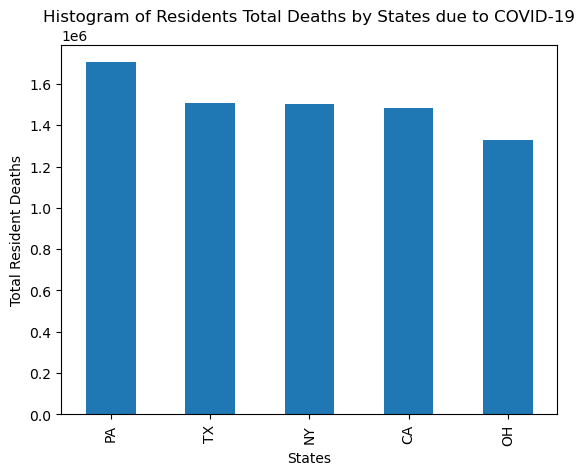

In [122]:
states_deaths = data.groupby("Provider State")["Residents Total COVID-19 Deaths"].sum()
states_deaths = states_deaths.sort_values(ascending=False)
print(states_deaths.head())

states_deaths.head(5).plot.bar()
plt.xlabel("States")
plt.ylabel("Total Resident Deaths")
plt.title("Histogram of Residents Total Deaths by States due to COVID-19")
plt.show()